In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from joblib import dump, load

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 加载数据集
# 训练集
train_set = load('train_set')
train_label = load('train_label')
# 测试集
test_set = load('test_set')
test_label = load('test_label')

# 使用 squeeze 函数转换为 1 维数组
train_label = np.squeeze(train_label)

In [5]:
# 构建 XGBoost 模型并进行训练：
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# 定义XGBoost分类器
model = xgb.XGBClassifier()

# 运行网格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(train_set, train_label)

# 输出最佳参数组合和准确率
print("最佳参数组合：", grid_search.best_params_)
print("最佳准确率：", grid_search.best_score_)

最佳参数组合： {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
最佳准确率： 0.9920264146174124


In [8]:
from sklearn.metrics import  r2_score
import numpy as np
from sklearn.metrics import accuracy_score,classification_report # 引入准确度评分函数
# 进行预测并评估模型性能：
# 使用最佳参数组合构建新的分类器
best_params = grid_search.best_params_
model = xgb.XGBClassifier(**best_params)

# 在完整的训练集上进行训练
model.fit(train_set, train_label)

# 进行预测
y_pred = model.predict(test_set)

# 进行预测并评估模型性能：
# 进行预测
y_pred = model.predict(test_set)

score = r2_score(test_label, y_pred)
print('*'*50)
print(' XGBoost 模型分数--R^2:', score)

print('*'*50)
# 模型 评估
print("训练集准确率: %.3f" % accuracy_score(train_label, model.predict(train_set)))
print("测试集准确率: %.3f" % accuracy_score(test_label, y_pred))
print("测试集结果评估报告为：\n",classification_report(test_label,y_pred))


**************************************************
 XGBoost 模型分数--R^2: 0.9996296264865293
**************************************************
训练集准确率: 1.000
测试集准确率: 0.990
测试集结果评估报告为：
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      0.94      0.97        69
         2.0       0.99      0.99      0.99        72
         3.0       1.00      1.00      1.00        63
         4.0       1.00      1.00      1.00        71
         5.0       1.00      0.98      0.99        63
         6.0       1.00      0.98      0.99        65
         7.0       1.00      1.00      1.00        67
         8.0       0.93      1.00      0.96        75
         9.0       1.00      1.00      1.00        82

    accuracy                           0.99       699
   macro avg       0.99      0.99      0.99       699
weighted avg       0.99      0.99      0.99       699



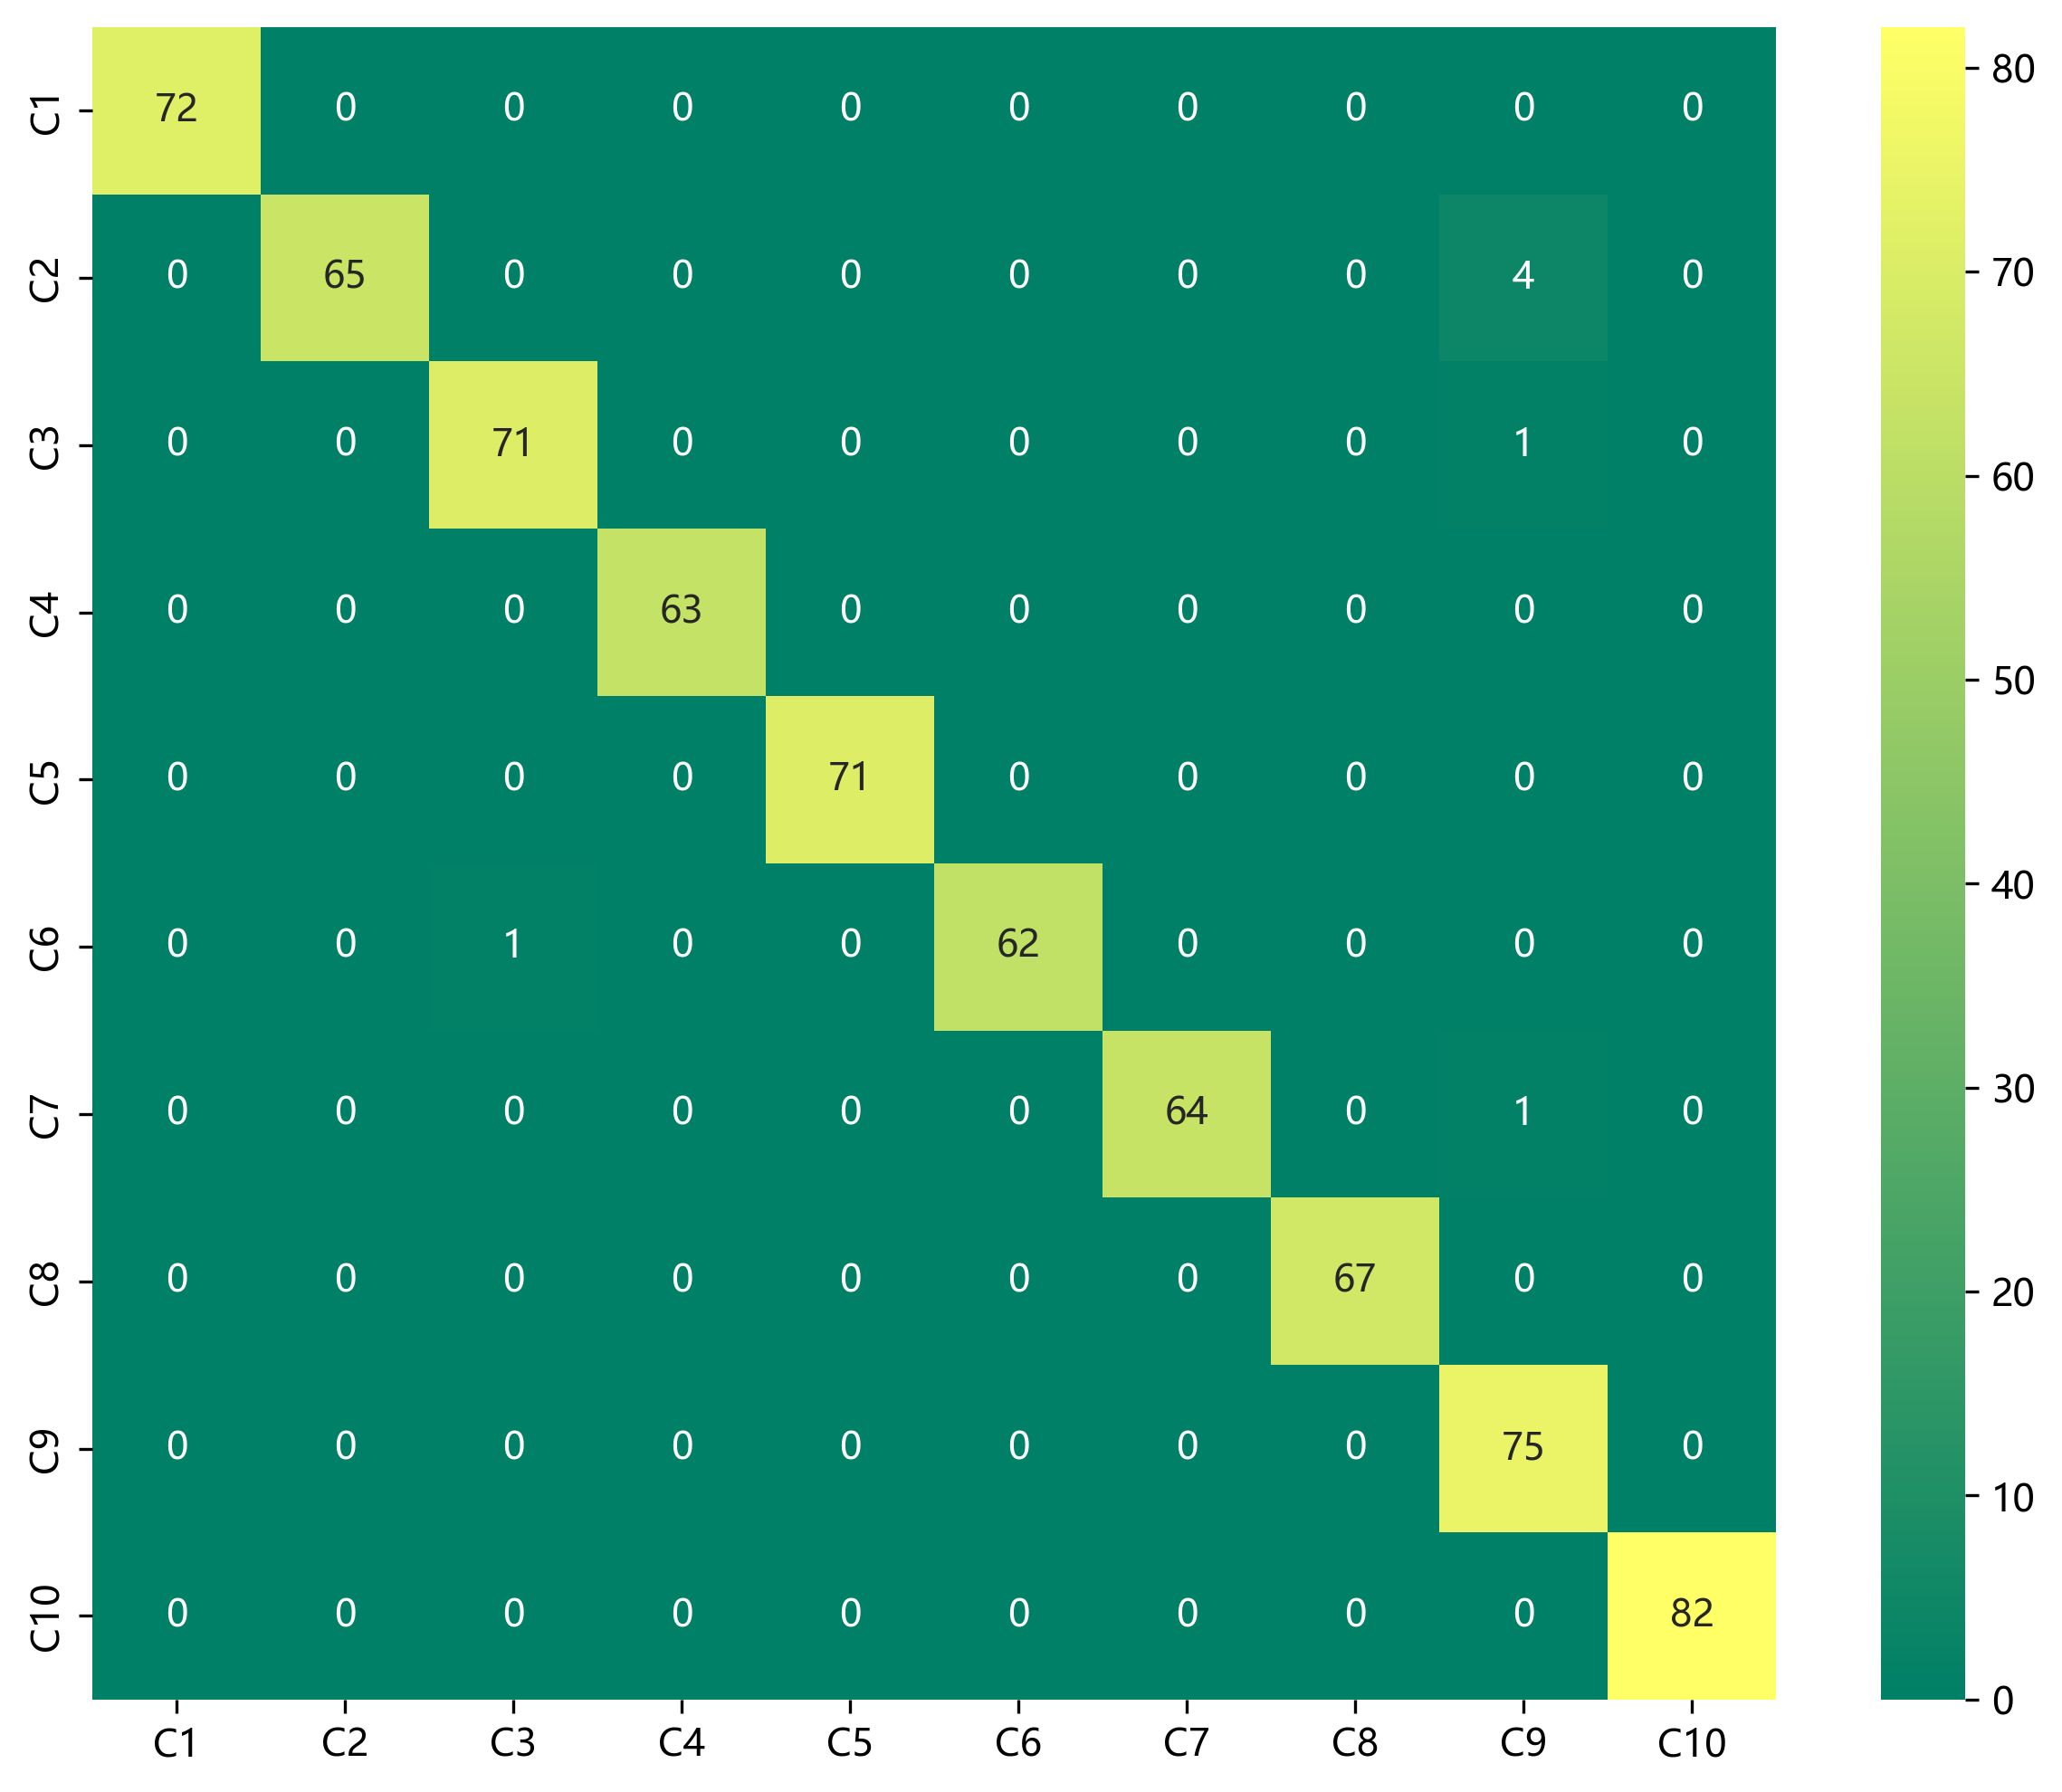

In [9]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker
# 绘制混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
# 原始标签和自定义标签的映射
label_mapping = {
    0: "C1",1: "C2",2: "C3",3: "C4",4: "C5",
    5: "C6",6: "C7",7: "C8",8: "C9",9: "C10",
}

# 混淆矩阵
confusion_mat = confusion_matrix(test_label, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(confusion_mat,  xticklabels=label_mapping.values(), yticklabels=label_mapping.values(),annot=True, fmt='d', cmap='summer')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
plt.show()